In [1]:
!pip install ctgan table-evaluator

In [2]:
pip install ctgan

In [3]:
pip install ctgan scikit-learn matplotlib seaborn xgboost pandas

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [29]:
uploaded = files.upload()
df = pd.read_csv("diabetes_data.csv")

Saving diabetes_data.csv to diabetes_data (2).csv


In [ ]:
df_clean = df.drop(columns=['PatientID', 'DoctorInCharge'])

X = df_clean.drop(columns='Diagnosis')
y = df_clean['Diagnosis']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9122
Logistic Regression Accuracy: 0.8351
Gradient Boosting Accuracy: 0.9362


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:36:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9255


In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

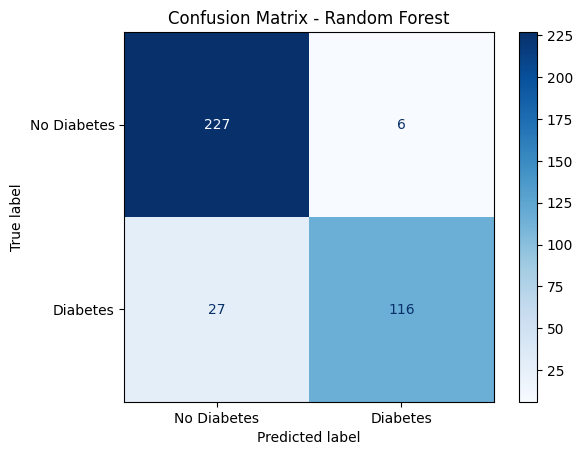

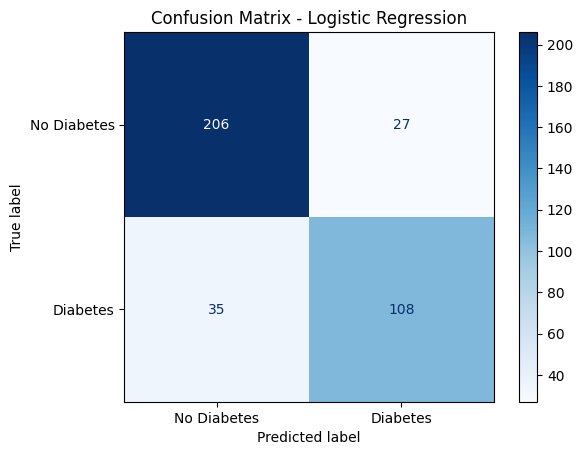

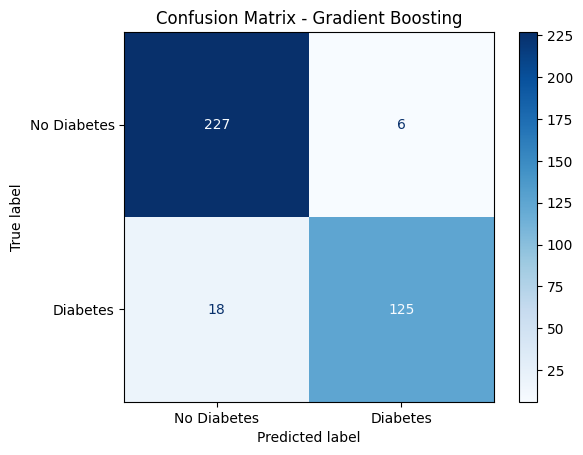

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


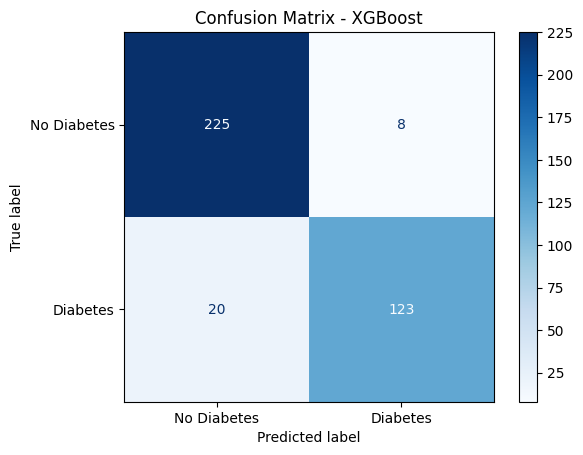

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No Diabetes", "Diabetes"])    
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [ ]:
      y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

IndentationError: unexpected indent (ipython-input-37-47280334.py, line 2)

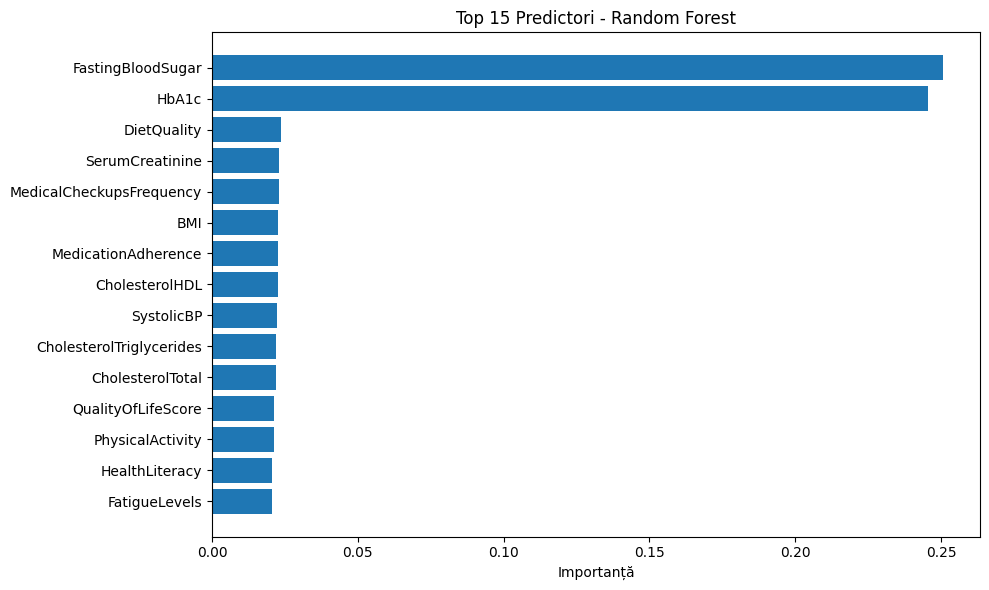

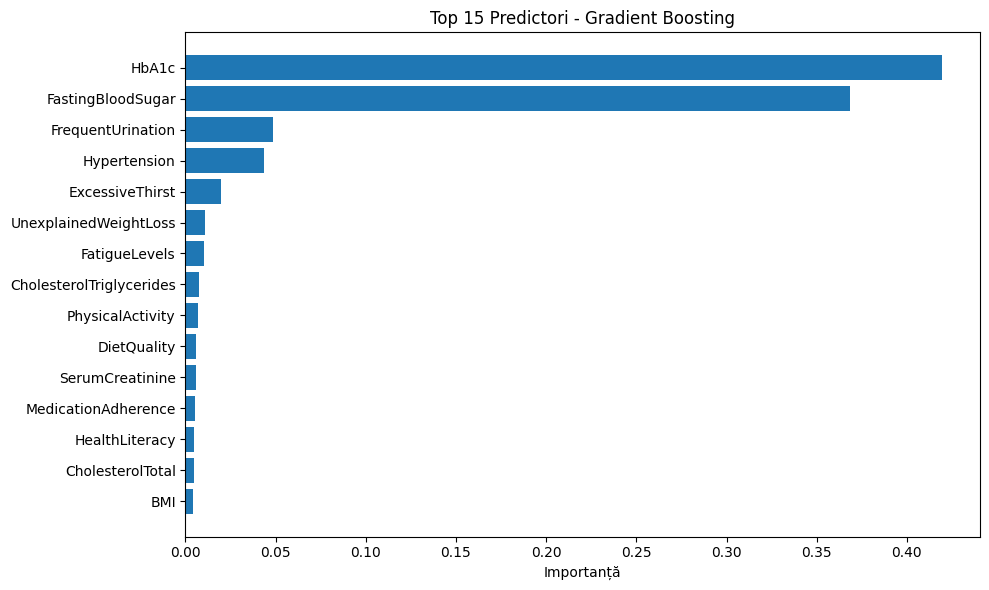

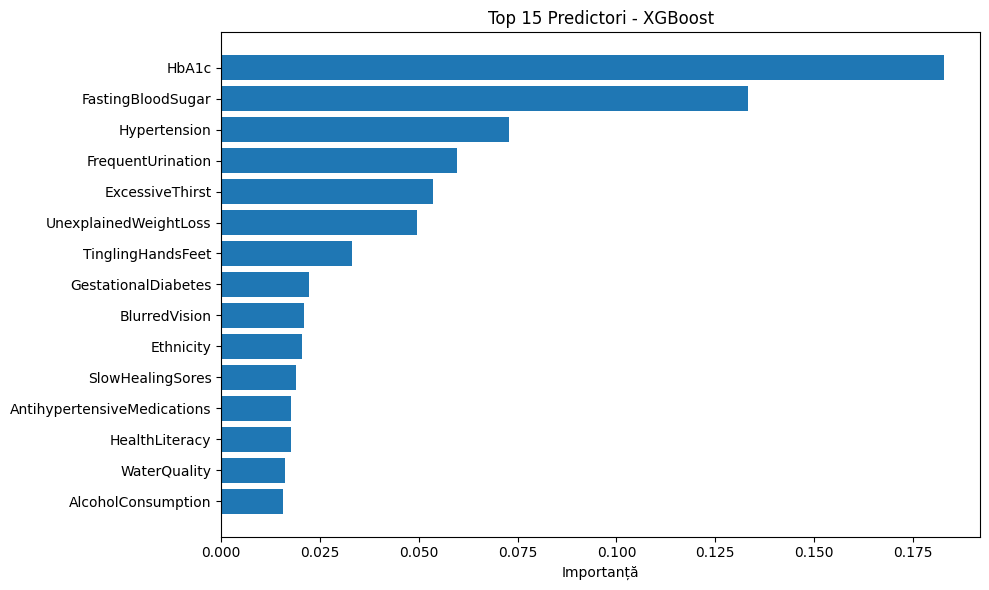

In [ ]:
import numpy as np

feature_names = X.columns

def plot_feature_importance(model, model_name):
        if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        print(f"{model_name} nu are atributul 'feature_importances_'")
        return

        indices = np.argsort(importances)[::-1][:15]
    top_features = feature_names[indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features[::-1], top_importances[::-1])
    plt.xlabel("Importanță")
    plt.title(f"Top 15 Predictori - {model_name}")
    plt.tight_layout()
    plt.show()

for name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
    model = models[name]
    plot_feature_importance(model, name)